# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

dados = pd.read_csv('./input/dados.csv')
sns.set_style("whitegrid")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
dados['APGAR5_CATEGORIA'] = pd.cut(dados['APGAR5'], bins=[0, 3, 5, 7, 10], labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])

print(dados[['APGAR5', 'APGAR5_CATEGORIA']].head())

   APGAR5 APGAR5_CATEGORIA
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

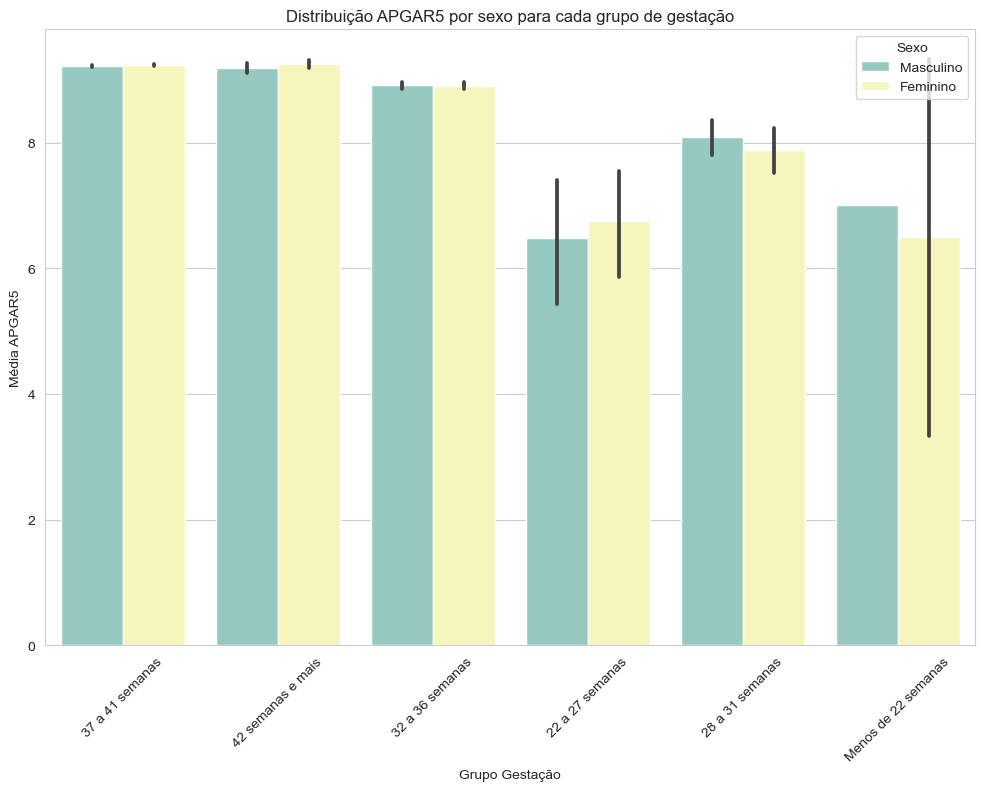

In [4]:
dados_filtrados = dados.dropna(subset=['APGAR5', 'SEXO', 'GESTACAO'])

plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=dados_filtrados, palette='Set3')
plt.title('Distribuição APGAR5 por sexo para cada grupo de gestação')
plt.xlabel('Grupo Gestação')
plt.ylabel('Média APGAR5')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.grid(True, axis='y')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tab_cruz_df = pd.crosstab(index=dados['GESTACAO'], columns=dados['APGAR5'])

print(tab_cruz_df)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
linhas_porc = tab_cruz_df.apply(lambda row: row / row.sum() * 100, axis=1)

print(linhas_porc)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

              Gestação  Nascimentos
0      37 a 41 semanas        22589
1      32 a 36 semanas         2249
2    42 semanas e mais          700
3      28 a 31 semanas          165
4      22 a 27 semanas           86
5  Menos de 22 semanas            7


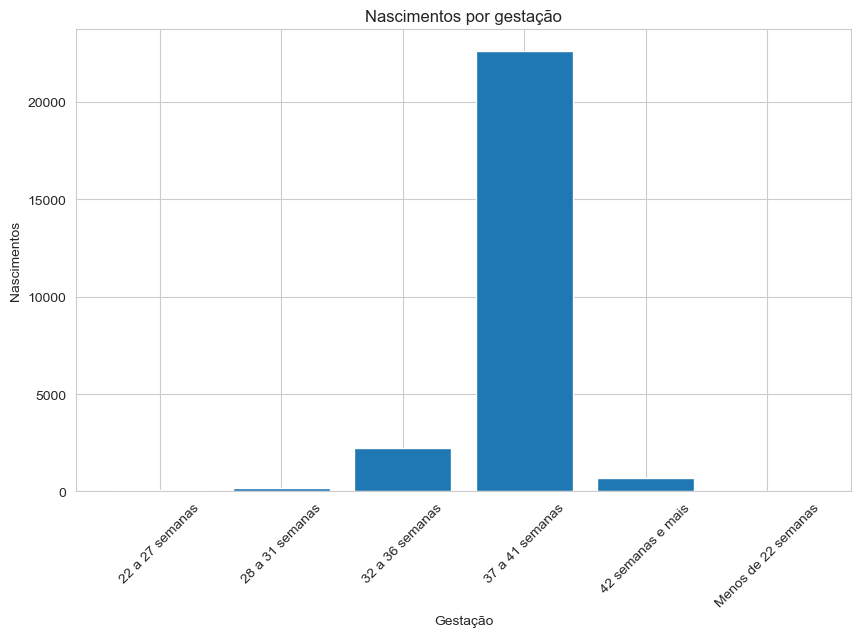

In [8]:
tab_gestacao = dados['GESTACAO'].value_counts().reset_index()
tab_gestacao.columns = ['Gestação', 'Nascimentos']
print(tab_gestacao)

tab_gestacao_agrup = tab_gestacao.groupby('Gestação')['Nascimentos'].sum()


plt.figure(figsize=(10, 6))
plt.bar(tab_gestacao_agrup.index, tab_gestacao_agrup.values)
plt.xlabel('Gestação')
plt.ylabel('Nascimentos')
plt.title('Nascimentos por gestação')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

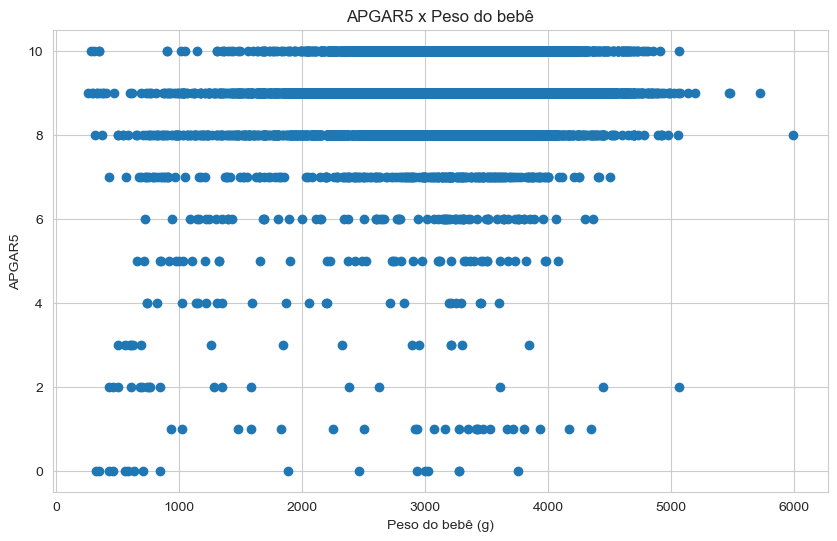

In [9]:
dados['APGAR5'] = pd.to_numeric(dados['APGAR5'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(dados['PESO'], dados['APGAR5'])
plt.xlabel('Peso do bebê (g)')
plt.ylabel('APGAR5')
plt.title('APGAR5 x Peso do bebê')
plt.show()